Osnabrück University - Computer Vision (Winter Term 2021/22) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 00b: Cameras and Noise

## Introduction

This is the second introductory exercise sheet. It is somewhat shorter than the regular sheets, intended to make yourselves familiar with our procedures. This sheet should be solved in groups and solutions should be uploaded to your group's dedicated folder in Stud.IP before **Tuesday, November 2nd, 14:00**. 
In case you cannot do this sheet (due to technical or organizational problems) please upload a description of your problem instead. Your tutor will help you to solve the problems in the first feedback session and you may hand in this sheet together with the first regular sheet one week later.

In case of questions, feel free to post them to the forum and/or raise them in the next practice session.

## Assignment 1: Pinhole Camera and One Chip Cameras
In this assignment we will use the pinhole camera model and formulae from slides CV-02 page 10.

Imagine a very low budget autonomous car with a pinhole camera with a focal length of $24\,\text{mm}$ at the front.

![slides2_10.png](slides2_10.png)


**(a)** A pedestrian walks in front of the car. On the camera sensor the image of the person has a height of $12\,\text{mm}$. Assume that the person is of average height of $1.70\,\text{m}$. How far is the car away from the person?

To calculate the distance of the person, we take its head a the point of interest. Given the assignment, it is reasonable to assume that the person's head is right in front of the car and therefore (given the coordinate system from slide 10) its x-value is 0. Since the person is 1.70m, its y-value is 1.7. Now we can use the formula for calculating the y-coordinate of a projection (y') in a pinhole camera: $ y'= f'\cdot \frac{y}{z} $ 

Since we are interested in the distance of the person from the car, we need to calculate the z value of the person's head. Therefore, we can just rearrange the equation to obtain: $z=f' \cdot\frac{y}{y'}$

The last thing we need to remember is that the y-coordinate of the head's projection is negative due to the real head having a positive y-coordinate and the fact that the projection is always upside down.

Now we can use the given values for focal lenght and the projection's y-value to compute the distance: $z=f' \cdot\frac{y}{y'} = 0.024m \cdot \frac{1.7m}{-0.012m} = -3.4m$ . So the person is 3.4m in front of the car.

**(b)** A rectangular traffic sign with a width of $0.75\,\text{m}$ and a height of $0.50\,\text{m}$ is $2\,\text{m}$ away from the front of the same car with the same camera. This camera is a One Chip Camera with a Bayer Filter. Each colour pixel has a size of $10\,\text{μm}$ How many green pixels are inside the image of the traffic sign?

In a Bayer Filter half the filters are green filters, so half of the image's pixels will be green. To get the exact number of green pixels in this particular image, we can just compute the total number of pixels in it and then divide that by 2.

To get the total number of pixels, we first need to compute the dimensions of the projection. If we assume the center of the rectangle is right in front of the car (y- and x-value are 0), then we know the coordinates of the middle points of all edges: (0, 0.25, -2) for the upper horizontal edge and (0.375, 0, -2) for the right vertical edge.

Since it is a rectangle, we can now just compute the projections of these middle points and then use their x-/y-value to get the projection height and width.

To get the projection's height, we compute the projection of the middle point of the horizontal edge: $x' = 0$ because $x = 0$ and $y' = f' \cdot \frac{y}{z} = 0.024m \cdot \frac{0.25m}{-2m} = -0.003m$. Therefore, the projections height is $0.006m = 6000 \mu m$.

To get the projection's width, we compute the projection fo the middle point of the vertical edge: $y' = 0$ because $y = 0$ and $x' = f' \cdot \frac{x}{z} = 0.024m \cdot \frac{0.375m}{-2m} = -0.0045m$. Therefore, the projections height is $0.009m = 9000 \mu m$.

To compute the total number of pixels we can divide length and width by the size of one pixel and then multiply both values: $\frac{6000}{10} \cdot \frac{9000}{10} = 540,000$

Since 50% of the filters in a Bayer Filter are green filters, also 50% of the pixels will be green. Therefore, there are 270,000 green pixels in the image.

## Assignment 2: Noise

In this assignment we will use `numpy.random` functions to add artificial noise to one of our images. Normally, we are interested in removing noise from images. However, if we want to make an algorithm robust against noise, we might want to create artificial images with controlled noise.

**(a)** Add Gaussian noise to an image with the help of ``numpy.random.normal``. Try different standard deviations of the distribution. A good starting value would be $20$.

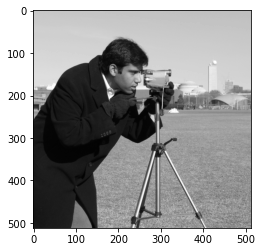

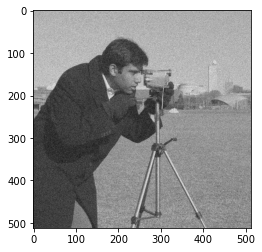

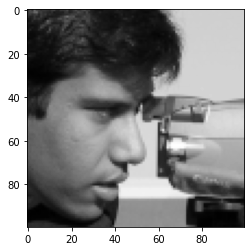

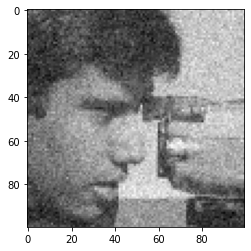

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import numpy as np

sigma = 20
im = imageio.imread("imageio:camera.png")

im_noisy = im.copy() + np.random.normal(0,20,np.shape(im))

# YOUR CODE HERE

plt.figure()
plt.gray()
plt.imshow(im)
plt.figure()
plt.imshow(im_noisy)
plt.figure()
plt.imshow(im[100:200,200:300])
plt.figure()
plt.imshow(im_noisy[100:200,200:300])
plt.show()

**(b)** Add Salt-and-pepper noise to one of our images. Create one image with $5\%$ noise and one with $50\%$. Experiment with other values. Can you give a threshold when is the noise disruptive?

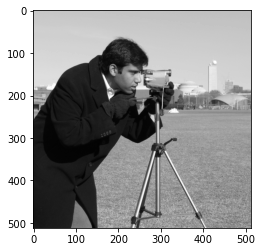

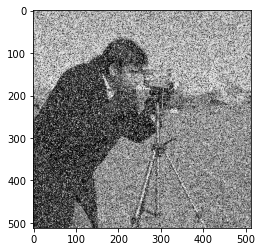

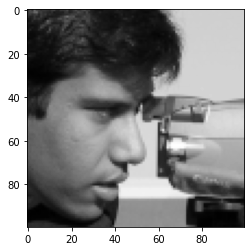

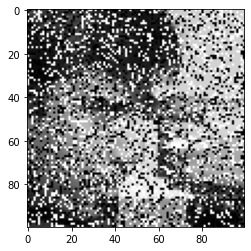

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import numpy as np

noise_ratio = .4
im = imageio.imread("imageio:camera.png")

im_noisy = im.copy()

# iterate through the rows of the picture
for yn in range(im_noisy.shape[0]):
    # iterate through the columns o the picture
    for xn in range(im_noisy.shape[1]):
        # create random number between 0 and 1
        # if this number is smaller than the noise_ratio then set the pixel at yn,xn to 0 or 255
        if np.random.rand() <= noise_ratio: im_noisy[yn, xn] = 0 if np.random.randint(2) else 255

plt.figure()
plt.gray()
plt.imshow(im)
plt.figure()
plt.imshow(im_noisy)
plt.figure()
plt.imshow(im[100:200,200:300])
plt.figure()
plt.imshow(im_noisy[100:200,200:300])
plt.show()


It is difficult to give an exact threshold from which the noise disrupts the image. But at around 60% noise the image becomes very hard to recognize. However, the zoomed-in image gets unrecognizable even with a lot lower noise ratio of about 30-40%.

**(c)** How could we remove noise from an image. Do you have an idea for Gaussian Noise? Do you have an idea for Salt-and-pepper noise? This is a brainstorming questions! We do not except working solutions but ideas on how you would approach the problem!

A superficial option would be to use a neural network which is trained using images with added noise as input and the original image without noise as target. Since we can easily generate a randomly noisy version of any image (like above), it should also not be a problem to generate a large enough dataset for training. This approach should work for both Gaussian and Salt-and-pepper noise.

A more technical and specific solution would be to adapt the noisy pixel it to its surrounding. One could make use of a convolutional kernel matrix and average the values of other pixels nearby, and copying that average to the noisy pixel in the new image. In the case of the Gaussian Noise, the average would be weighted, for the values of nearby pixels to yield more importance than ones that are far away. The stronger the blur is, the wider the convolution kernel has to be and the more calculations take place.